## Intro


New Zealand Modelling Data Consortium is "a partnership between Universities, Crown Research Institutes, and research and public service organizations" (https://www.envlib.org). The consortium hosts the Open Environmental Digital Library which contains a comprehensive set New Zealand focused environmental geospatial datasets which continues to grow. The dataset has been processed to be easily accessible through a companion python library (https://tethysts.readthedocs.io). In this lab, you will learn how to access the datasets in the digital library through this python interface. We will use the provided Fire Weather Index (FWI) calculator to calculate FWI and other fire weather indices from the Fire Emergency New Zealand's extensive weather stations.

In [1]:
# fireweather.niwa.co.nz   #fire stuff used for our fire warnings. only uses weather data no real fuel data

# nasa one   https://data.giss.nasa.gov/impacts/gfwed/

# envlib.org   # multi company/uni nz lib of gis stuff

In [2]:
import datetime
import numpy as np
import xarray as xr
import warnings
import fwi_nz as fwi_calc  # The fwi calculator, make sure to have fwi_nz.py in the same folder as this notebook
warnings.filterwarnings('ignore')

Below lines import the tethys library and some functions built for this course to help interacting with tethys easier.

In [3]:
import envlib_helper as envlib
from tethysts import Tethys

The line below initializes the Tethys and gives you a tehtys instance that acts like a window to request data.

In [4]:
ts = Tethys()

In [5]:
ts

In [6]:
datasets = ts.datasets  #list of dicts holding datasets

In [7]:
datasets[0]

{'feature': 'waterway',
 'parameter': 'water_use',
 'method': 'simulation',
 'product_code': 'WAP allocation method 1',
 'owner': 'Environment Southland',
 'aggregation_statistic': 'cumulative',
 'frequency_interval': '24H',
 'utc_offset': '12H',
 'dataset_id': '0a91ee3135dca335d7300894',
 'units': 'm^3',
 'license': 'https://creativecommons.org/licenses/by/4.0/',
 'attribution': 'Data licenced by Environment Southland',
 'spatial_distribution': 'sparse',
 'geometry_type': 'Point',
 'grouping': 'none',
 'extent': {'type': 'Polygon',
  'coordinates': [[[169.11231, -46.6625],
    [169.11231, -44.76767],
    [167.51013, -44.76767],
    [167.51013, -46.6625],
    [169.11231, -46.6625]]]},
 'time_range': {'from_date': '2000-06-30T12:00:00',
  'to_date': '2022-03-29T12:00:00'},
 'heights': [0.0],
 'cf_standard_name': 'water_use',
 'precision': 0.01,
 'description': 'This dataset is an estimate of the usage split by the water abstraction point (WAP) in Environment Southland (ES). The method i

This function below will print all the datasets available to a table and also save it as a excel file in the current folder.

In [8]:
envlib.get_all_dataset_information(ts) #way nicer

method  \
feature    parameter           owner                                            
atmosphere barometric_pressure ECMWF                               simulation   
                               Met Solutions                       simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
                               NZ Open Modelling Consortium        simulation   
...                                                                       ...   
waterway   temperature         Environment Canterbury        sensor_recording   
                               Environment Canterbury          field_activity   
           water_use           Environment Southland               simulation   
                               Environment Southland               simulation   
                               Environment Southland               simulation   

                                                                                              product_code  \
feature    parameter           owner                                                                         
atmosphere barometric_pressure ECMWF                                                  reanalysis-era5-land   
                               Met Solutions                         WRF NZ South Island Central Otago 3km   
                               NZ Open Modelling Consortium    UC WRF NZ South Island North Canterbury 1km   
                               NZ Open Modelling Consortium       UC WRF NZ South Island Central Otago 1km   
                               NZ Open Modelling Consortium  UC WRF NZ South Island Marlborough Nelson 1km   
...                                                                                                    ...   
waterway   temperature         Environment Canterbury                              quality_controlled_data   
                               Environment Canterbury                              quality_controlled_data   
           water_use           Environment Southland                               WAP allocation method 1   
                               Environment Southland                                   estimation method 1   
                               Environment Southland                             stream depletion method 1   

                                                            aggregation_statistic  \
feature    parameter           owner                                                
atmosphere barometric_pressure ECMWF                                instantaneous   
                               Met Solutions                        instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
                               NZ Open Modelling Consortium         instantaneous   
...                                                                           ...   
waterway   temperature         Environment Canterbury                        mean   
                               Environment Canterbury                    sporadic   
           water_use           Environment Southland                   cumulative   
                               Environment Southland                   cumulative   
                               Environment Southland                         mean   

                                                            frequency_interval  \
feature    parameter           owner                                             
atmosphere barometric_pressure ECMWF                                         H   
                               Met Solutions                                 H   
                               NZ Open Modelling Consortium                  H   
                               NZ Open Modelling Consortium           

### Get a FENZ weather station data

You need to know which dataset you are requring by given some information. These information can be found either from the excel file generated obove or from the discovery tool on (https://www.envlib.org).

In [9]:
owner = "FENZ"
method = "sensor_recording"
product_code = "raw_data"

Here we use lat and lon to specify the station location.

In [10]:
# lat = -43.47
# lon = 171.672
lat = -43.91498
lon =  170.12862

In [11]:
station_data = envlib.get_data_from_lat_lon(ts, owner, method, product_code, lat, lon,squeeze_dims=True)

The output is an xarray dataset which contains all the variables available from that station.

In [12]:
station_data

<xarray.Dataset>
Dimensions:                   (time: 44195)
Coordinates:
  * time                      (time) datetime64[ns] 2017-03-15 ... 2022-03-31...
    geometry                  <U42 '010100000092B3B0A71D4465403E3F8C101EF545C0'
    height                    int8 2
Data variables:
    station_id                object 'b1ccc6ead3273d01c94501bd'
    externalId                object 'CLIDB_43213'
    name                      object 'Glentanner'
    ref                       object 'glentanner'
    wind_direction            (time) float32 113.1 116.8 97.2 ... 126.4 115.4
    lat                       float64 -43.91
    lon                       float64 170.1
    temperature               (time) float32 14.8 16.0 16.8 ... 17.5 18.4 18.9
    precipitation             (time) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    wind_speed                (time) float32 2.34 1.82 1.81 ... 2.42 2.88 1.82
    relative_humidity         (time) float32 70.2 66.8 65.4 ... 71.6 67.8 68.2
    volumetric_water_content  (time) float32 nan nan nan nan ... 10.0 10.0 10.0
Attributes:
    result_type:     time_series
    title:           mean wind_direction in deg of the atmosphere by a sensor...
    institution:     FENZ
    license:         https://creativecommons.org/licenses/by/4.0/
    source:          sensor_recording
    system_version:  4
    version_date:    2022-03-23T00:00:00

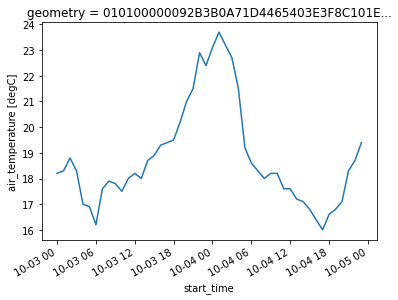

In [13]:
station_data.sel(time=slice("2020-10-03","2020-10-04")).temperature.plot()

The fwi calculator provided in this lab has been adapted to New Zealand based on lattitude and longitude. Make sure that the temperature is in ***degree celsius***, the relative humidity is between 0 and 100,and precipitation's unit is mm. Also make sure to input the wind speed unit (either "m/s" or "km/h" depends on the data). The four atmospheric variables required for the FWI are temperature, relative humidity, wind speed and precipitation. Make sure you enter the input using the exact order. The default initial values used for the indices are ```ffmc0=85.0,dmc0=6.0,dc0=15.0```. You can also change these initial values by providing them in the input. The code below can also handle multiple stations or spatial data like WRF output.

In [21]:
%%time
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2021-01-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)

CPU times: user 3.99 s, sys: 0 ns, total: 3.99 s
Wall time: 3.99 s


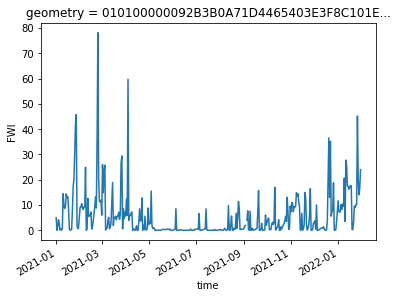

In [22]:
fwi_data.plot()

# Tasks
1. Because FWI is calculated recursively, strictly speaking, the starting date of FWI calculation has to follow a set of criteria (https://cwfis.cfs.nrcan.gc.ca/background/dsm/fwi). Is FWI sensitive to the starting date? Try to change the starting date of the FWI and discuss how that might impact the FWI calculation.
2. Go to the NIWA fire weather website (https://fireweather.niwa.co.nz/indices), Find a station on that website and then calculate FWI from a station closiest to that station on Tethys. Calculate your own FWI and compare it with the NIWA's results. Are there any big differences? Try to explain it.

### Task 1

FWI Calculation Start-up
To determine spring start-up dates and starting fuel moisture code values, the procedures described in Turner and Lawson (1978) are used. There are two methods, depending on snow cover.

Method 1
For stations that report significant snow cover during the winter, start-up occurs when the station has been snow-free for three consecutive days. Significant snow cover is defined as a mean snow depth of more than 10 cm, with snow cover present at least 75% of the days in January and February. Start-up values are as follows:

Fine Fuel Moisture Code (FFMC) is set to 85
Duff Moisture Code (DMC) is set to 6
Drought Code (DC) is set to 15*
Method 2
For stations that do not report significant snow cover during the winter, start-up occurs when the noon daily temperature is 12°C or higher for three consecutive days. The following values are used for start-up:

FFMC is set to 85
DMC is set to 2 times the number of days since precipitation
DC is set to 5 times the number of days since precipitation*
*Where overwinter precipitation data are available, the DC is set according to an alternative method, also found in Lawson and Armitage (2008), which takes into account the fact that saturation of the deep fuel layers might not occur over the winter. In areas with low overwinter precipitation, the starting value for the DC can be significantly higher than the default.

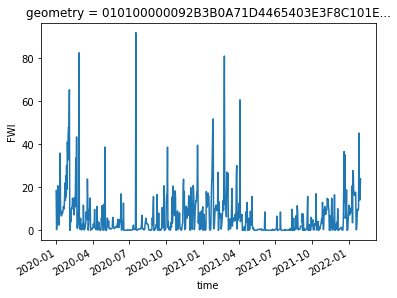

In [38]:
# Tried going back in time

ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2020-01-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)
fwi_data.plot()

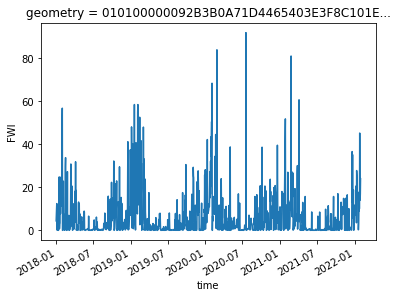

In [39]:
# Tried going back in time

ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2018-01-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)
fwi_data.plot()

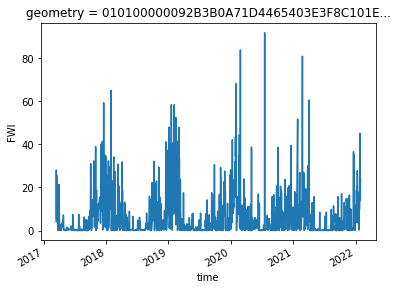

In [40]:
# Tried going back in time

ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2010-01-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)
fwi_data.plot()

The FWI seemed fine same kind of range

The FWI seemed fine same kind of range by date, the 80 that made y so tall is not in this range so i think its fine???

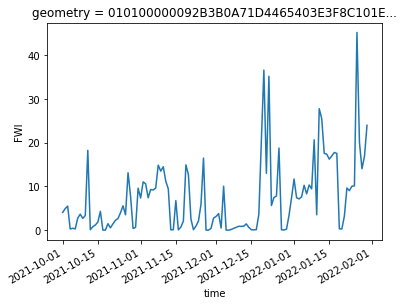

In [43]:
# made start date closer to end date
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2021-10-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)
fwi_data.plot()

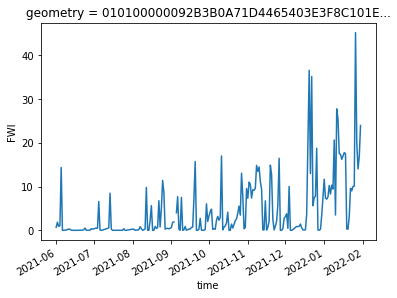

In [44]:
# made start date closer to end date
ffmc_data, dmc_data, dc_data, isi_data, bui_data, fwi_data = fwi_calc.FWI_combined_calc(
    station_data.temperature,
    station_data.relative_humidity,
    station_data.wind_speed,
    station_data.precipitation,
    start_date="2021-06-01",  ### this date will be used to initilized the parameters
    end_date = "2022-01-30",
    ws_unit="m/s"
)
fwi_data.plot()

###### No idea wtf he wants here tbh

he does not demo what he actually wants just says lots of words

### Task 2


